In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("C:/Users/nik/Desktop/ПРОГА/Titanik/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.insert(4, 'sex_encoded', np.where(data['Sex'] == 'male', 1, 0))
data

,PassengerId,Survived,Pclass,Name,sex_encoded,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#Nan, missing values
data.isna().sum()
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isna().sum()

C:\Users\nik\AppData\Local\Temp\ipykernel_5356\3320521369.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
sex_encoded      0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
X = data[['Pclass', 'sex_encoded', 'Fare']]
Y = data[['Survived']]

In [28]:
data_test = pd.read_csv("C:/Users/nik/Desktop/ПРОГА/Titanik/test.csv")
#data_test.head()
data_test.isna().sum()
data_test.dropna(subset=['Fare'], inplace=True)
data_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
sex_encoded      0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Разведочный анализ  EDA

In [29]:

data_f_s = data[['Survived', 'Pclass', 'sex_encoded', 'Fare', 'Age', 'PassengerId']]
data_f_s['Survived'].value_counts()
data_f_s



,Survived,Pclass,sex_encoded,Fare,Age,PassengerId
0,0,3,1,7.2500,22.0,1
1,1,1,0,71.2833,38.0,2
2,1,3,0,7.9250,26.0,3
3,1,1,0,53.1000,35.0,4
4,0,3,1,8.0500,35.0,5
...,...,...,...,...,...,...
886,0,2,1,13.0000,27.0,887
887,1,1,0,30.0000,19.0,888
888,0,3,0,23.4500,NaN,889
889,1,1,1,30.0000,26.0,890


In [30]:
target = 'Survived'

counts = data[target].value_counts()
round(counts[1]/counts.sum(), 3)

0.384

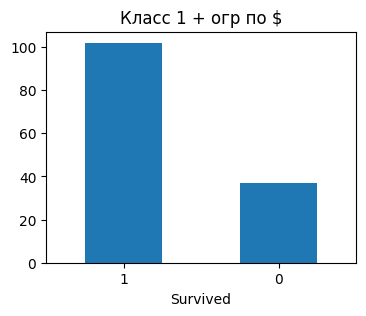

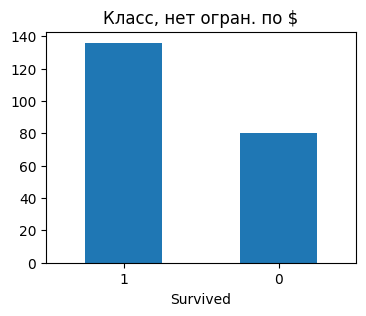

In [31]:
import matplotlib.pyplot as plt

data_1 = data.loc[(data['Pclass'] == 1) & (data['Fare'] > 50), ['Survived', 'Pclass', 'Sex']]
data_2 = data.loc[(data['Pclass'] == 1), ['Survived', 'Pclass', 'Sex']]
counts_1 = data_1[target].value_counts()
counts_2 = data_2[target].value_counts()
plt.figure(figsize=(4, 3))
plt.title('Класс 1 + огр по $')
counts_1.plot(kind='bar', rot=0)

plt.figure(figsize=(4, 3))
counts_2.plot(kind='bar', rot=0)
plt.title('Класс, нет огран. по $')
plt.show()


# Pclass, sex, Fare

In [32]:
data.duplicated().sum()

0

Index(['Pclass', 'Fare'], dtype='object')

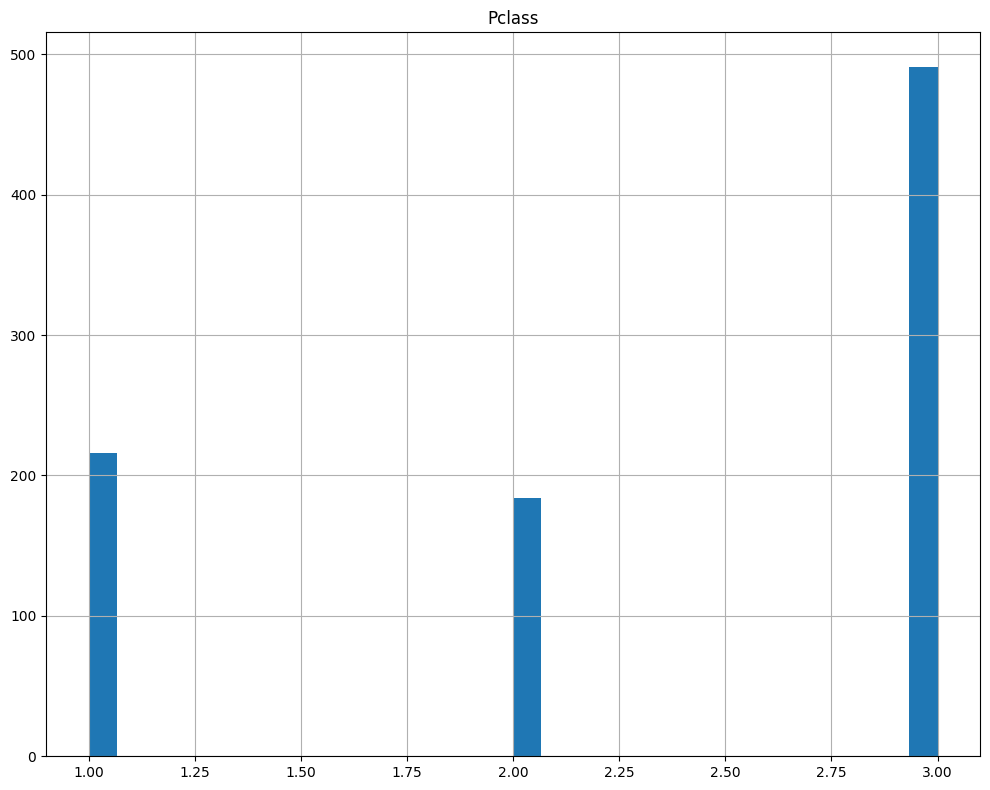

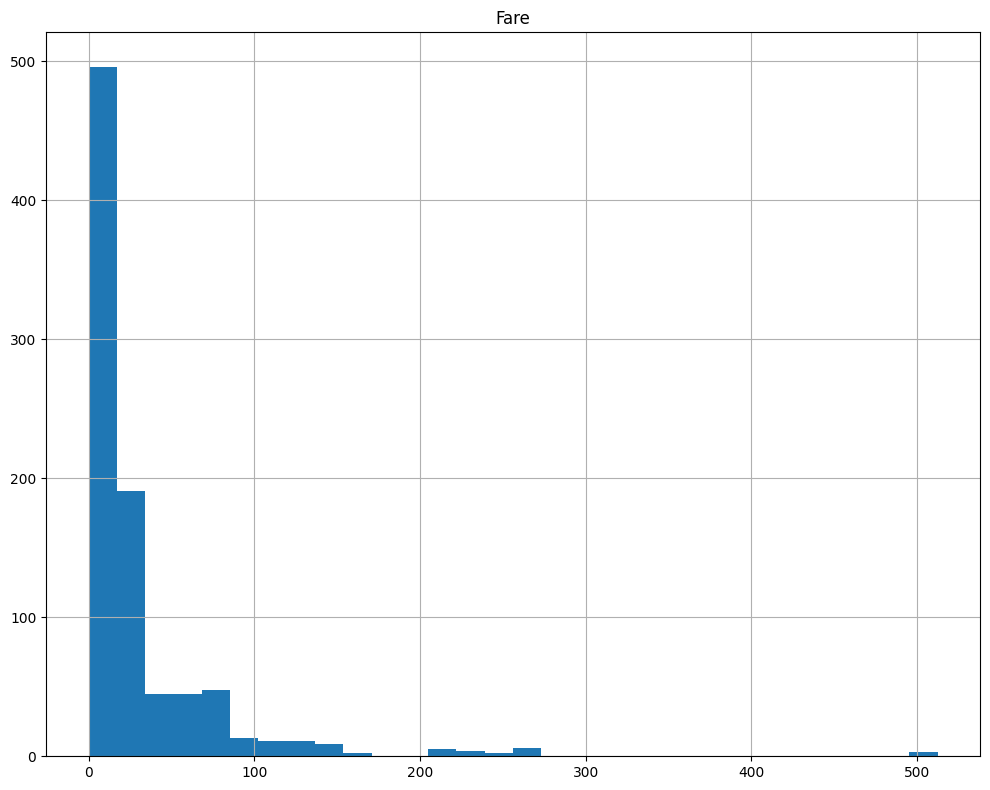

In [33]:
data_f_s
cols = data_f_s.columns.drop([target, 'sex_encoded', 'Age', 'PassengerId'])
display(cols)
for col in cols:
    plt.figure(figsize=(10, 8))
    data_f_s[col].hist(bins=30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

<Figure size 1000x800 with 0 Axes>

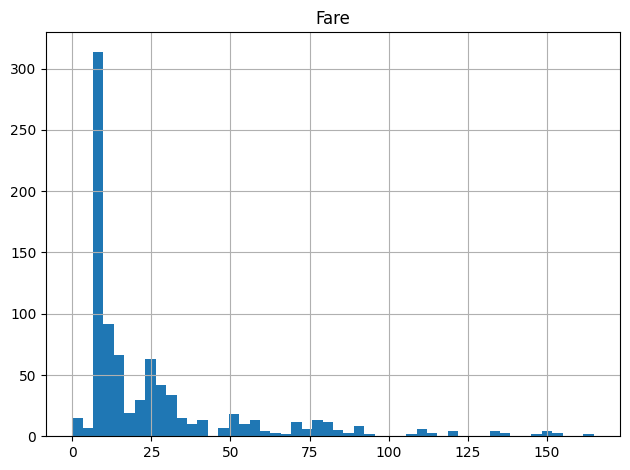

In [36]:
plt.figure(figsize=(10, 8))
data_f_s.loc[data_f_s['Fare'] <= 170 ,['Fare']].hist(bins=50)
plt.title(col)
plt.tight_layout()
plt.show()

In [37]:
data_f_s['Fare'].mode()
#['Fare'].std()

0    8.05
Name: Fare, dtype: float64

<Figure size 1000x800 with 0 Axes>

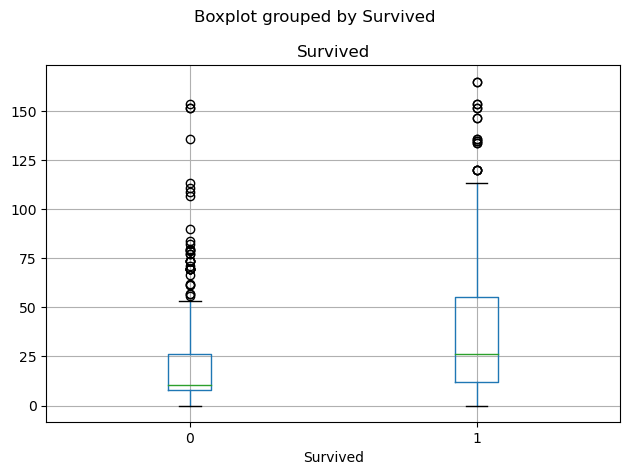

In [193]:
plt.figure(figsize=(10, 8))
data_f_s.loc[data_f_s['Fare'] <= 170 ,['Fare', 'Survived']].boxplot(column='Fare', by=target)
plt.title(target)
plt.tight_layout()
plt.show()

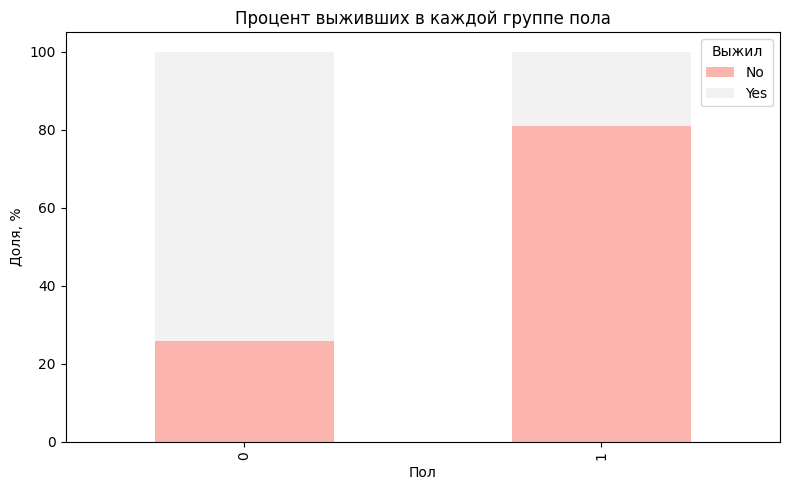

In [40]:
ct = pd.crosstab(
    data_f_s['sex_encoded'],
    data_f_s['Survived'],
    normalize='index'
) * 100

ct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    colormap='Pastel1'
)

plt.title('Процент выживших в каждой группе пола')
plt.xlabel('Пол')
plt.ylabel('Доля, %')
plt.legend(title='Выжил', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.show()

Index(['Survived', 'Pclass', 'sex_encoded', 'Fare', 'Age', 'PassengerId'], dtype='object')


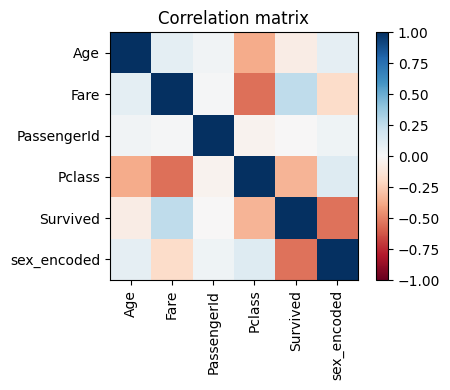

In [45]:
cols = data_f_s.columns
cor = data_f_s[cols.union([target])].corr()
print(cols)
ticks = range(len(cor))                 # позиции 0,1,...,n-1
labels = cor.columns

plt.figure(figsize=(5, 4))
plt.imshow(cor, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(ticks=ticks, labels=labels, rotation=90)
plt.yticks(ticks=ticks, labels=labels)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()


In [47]:
display(cor)
data_4 = data.dropna(subset=['Age'])
corr_Pclass = data_4[target].corr(data_f_s['Age'], method='pearson')
print(corr_Pclass)


,Age,Fare,PassengerId,Pclass,Survived,sex_encoded
Age,1.000000,0.096067,0.036847,-0.369226,-0.077221,0.093254
Fare,0.096067,1.000000,0.012658,-0.549500,0.257307,-0.182333
PassengerId,0.036847,0.012658,1.000000,-0.035144,-0.005007,0.042939
Pclass,-0.369226,-0.549500,-0.035144,1.000000,-0.338481,0.131900
Survived,-0.077221,0.257307,-0.005007,-0.338481,1.000000,-0.543351
sex_encoded,0.093254,-0.182333,0.042939,0.131900,-0.543351,1.000000


-0.07722109457217764


Главные факторы: Пол, класс билета, цена билета (зависит от класса)

Проверим на VIF зависимость Класса, цены билета

In [51]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Предположим, у вас DataFrame data и два признака:
# Замените 'X1' и 'X2' на реальные имена колонок!
features = ['Fare', 'Pclass']
X = data_f_s[features].copy()

# 1) Добавляем константу (нужна для корректного расчёта)
X_const = add_constant(X)

# 2) Считаем VIF для каждой колонки (в т. ч. для const)
vif_data = pd.DataFrame({
    'feature': X_const.columns,
    'VIF': [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})

print(vif_data)

  feature        VIF
0   const  15.358041
1    Fare   1.432562
2  Pclass   1.432562


Используем оба фактора, так как corr = 0.55, VIF = 1.4, и используем линейную модель

Обучим первую модель - логистическую регрессию

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


,Survived,Pclass,sex_encoded,Fare,Age,PassengerId
0,0,3,1,7.2500,22.0,1
1,1,1,0,71.2833,38.0,2
2,1,3,0,7.9250,26.0,3
3,1,1,0,53.1000,35.0,4
4,0,3,1,8.0500,35.0,5
...,...,...,...,...,...,...
886,0,2,1,13.0000,27.0,887
887,1,1,0,30.0000,19.0,888
888,0,3,0,23.4500,NaN,889
889,1,1,1,30.0000,26.0,890


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)


In [75]:
data_new = data.copy()
data_new['Fare_log'] = np.log1p(data_new['Fare'])

# 2) Стандартизация (Z-оценка) логарифмированных признаков
scaler = StandardScaler()
data_new[['Fare_log']] = scaler.fit_transform(
    data_new[['Fare_log']]
)

# 3) One-Hot-кодирование категориальных признаков
#    Получим новые dummy-столбцы и сразу удалим оригиналы
data_new = pd.get_dummies(
    data_new,
    columns=['Pclass', 'Sex'],
)
data_new.drop(columns=['SibSp', 'Age', 'Cabin', 'Embarked', 'Ticket', 'Fare', 'Parch', 'Name', 'sex_encoded'], inplace=True)
data_new

,PassengerId,Survived,Fare_log,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,-0.879741,False,False,True,False,True
1,2,1,1.361220,True,False,False,True,False
2,3,1,-0.798540,False,False,True,True,False
3,4,1,1.062038,True,False,False,True,False
4,5,0,-0.784179,False,False,True,False,True
...,...,...,...,...,...,...,...,...
886,887,0,-0.333698,False,True,False,False,True
887,888,1,0.487082,True,False,False,True,False
888,889,0,0.242007,False,False,True,True,False
889,890,1,0.487082,True,False,False,False,True


In [142]:
data_test = pd.read_csv('test.csv')
data_test['Fare_log'] = np.log1p(data_test['Fare'])

# 2) Стандартизация (Z-оценка) логарифмированных признаков
scaler = StandardScaler()
data_test[['Fare_log']] = scaler.fit_transform(
    data_test[['Fare_log']]
)

# 3) One-Hot-кодирование категориальных признаков
#    Получим новые dummy-столбцы и сразу удалим оригиналы
data_test = pd.get_dummies(
    data_test,
    columns=['Pclass', 'Sex'],
)
data_test.drop(columns=['SibSp', 'Age', 'Cabin', 'Embarked', 'Ticket', 'Fare', 'Parch', 'Name'], inplace=True)
data_test

,PassengerId,Fare_log,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,892,-0.866767,False,False,True,False,True
1,893,-0.968773,False,False,True,True,False
2,894,-0.669205,False,True,False,False,True
3,895,-0.773486,False,False,True,False,True
4,896,-0.443987,False,False,True,True,False
...,...,...,...,...,...,...,...
413,1305,-0.841220,False,False,True,False,True
414,1306,1.741229,True,False,False,True,False
415,1307,-0.936946,False,False,True,False,True
416,1308,-0.841220,False,False,True,False,True


In [143]:
x_train = data_new[['Sex_female', 'Sex_male', 'Fare_log', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
y_train = data_new['Survived']
x_train, y_train

(     Sex_female  Sex_male  Fare_log  Pclass_1  Pclass_2  Pclass_3
 0         False      True -0.879741     False     False      True
 1          True     False  1.361220      True     False     False
 2          True     False -0.798540     False     False      True
 3          True     False  1.062038      True     False     False
 4         False      True -0.784179     False     False      True
 ..          ...       ...       ...       ...       ...       ...
 886       False      True -0.333698     False      True     False
 887        True     False  0.487082      True     False     False
 888        True     False  0.242007     False     False      True
 889       False      True  0.487082      True     False     False
 890       False      True -0.818987     False     False      True
 
 [891 rows x 6 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [159]:
x_test = data_test[['Sex_female', 'Sex_male', 'Fare_log', 'Pclass_1', 'Pclass_2', 'Pclass_3']].copy()

# y_test = data_test['Survived']
x_test['Fare_log'] = x_test['Fare_log'].fillna(x_test['Fare_log'].mode()[0])
x_test.isna().sum()

Sex_female    0
Sex_male      0
Fare_log      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [160]:
model = LogisticRegression(
    solver='liblinear',
    C=0.1,
    penalty='l1',
    random_state=42,
    max_iter=1000
)

In [161]:
model.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [168]:
y_pred = model.predict(x_train)
y_proba = model.predict_proba(x_train)[:,1]

In [170]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.model_selection import ( cross_val_score, GridSearchCV )

accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

roc_auc = roc_auc_score(y_train, y_proba)
print(roc_auc)

print("\nClassification Report:\n", classification_report(y_train, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))


0.7890011223344556
0.8376900052194847

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.69      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891

Confusion Matrix:
 [[468  81]
 [107 235]]


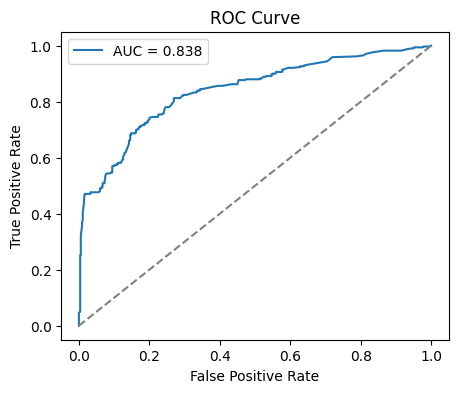

In [171]:
fpr, tpr, _ = roc_curve(y_train, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_train, y_proba):.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Результат предсказания для выживших recall = 0.68   f1_score = 0.71  roc_auc = 0.837

In [172]:
# 6. (Опционально) кросс-валидация
cv_scores = cross_val_score(
    model, x_train, y_train,
    cv=5,
    scoring='roc_auc'
)
cv_scores.mean()

0.8358868750386618

In [173]:
# 7. подбор гиперпараметров через GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1','l2'],
    'solver': ['liblinear', 'saga']
}
grid = GridSearchCV(
    model, param_grid,
    cv=5, scoring='roc_auc', n_jobs=-1
)
grid.fit(x_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)

Best params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV AUC: 0.8358868750386618


In [176]:
y_pred = model.predict(x_test)
data_res = pd.DataFrame({
    'PassengerId': data_test['PassengerId'],
    'Survived': y_pred
})
data_res.to_csv('res1.csv', index=False)